# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdfNoZeros/data_dictionary_trip_records_yellow.pdfNoZeros)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")


In [2]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`dfNoZeros = pd.read_parquet('file.parquet')`

In [149]:
# # Try loading one file

dfNoZeros = pd.read_parquet(r'C:\Users\Ranjith\Downloads\Upgrad\NYC Yellow Taxi Datasets\Datasets and Dictionary\trip_records\2023-1.parquet')
dfNoZeros.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty dfNoZeros to keep appending sampled data of each hour
# hour_data is the dfNoZeros of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the dfNoZeros
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [150]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

dfNoZeros['date'] = dfNoZeros['tpep_pickup_datetime'].dt.date
dfNoZeros['hour'] = dfNoZeros['tpep_pickup_datetime'].dt.hour

#Initialize blank dfNoZeros
sampled_data = pd.DataFrame()

for date in dfNoZeros['date'].unique():
    for hour in range(24):
        hour_data = dfNoZeros[(dfNoZeros['date'] == date) & (dfNoZeros['hour'] == hour)]
        sample = hour_data.sample(frac=0.05, random_state=42)
        sampled_data = pd.concat([sampled_data, sample])

print(sampled_data.info())
print(sampled_data.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 152087 entries, 428 to 2992873
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               152087 non-null  int64         
 1   tpep_pickup_datetime   152087 non-null  datetime64[us]
 2   tpep_dropoff_datetime  152087 non-null  datetime64[us]
 3   passenger_count        148483 non-null  float64       
 4   trip_distance          152087 non-null  float64       
 5   RatecodeID             148483 non-null  float64       
 6   store_and_fwd_flag     148483 non-null  object        
 7   PULocationID           152087 non-null  int64         
 8   DOLocationID           152087 non-null  int64         
 9   payment_type           152087 non-null  int64         
 10  fare_amount            152087 non-null  float64       
 11  extra                  152087 non-null  float64       
 12  mta_tax                152087 non-null  float6

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
folder_path = r'C:\Users\Ranjith\Downloads\Upgrad\NYC Yellow Taxi Datasets\Datasets and Dictionary\trip_records'
os.chdir(folder_path)

# Create a list of all the twelve files to read
file_list = [f for f in os.listdir() if f.endswith('.parquet')]

# initialise two empty dataframe
dfNoZeros = pd.DataFrame()
all_sampled_data = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file in file_list:
    try:

        dfNoZeros = pd.read_parquet(file)
        dfNoZeros['PUdate'] = dfNoZeros['tpep_pickup_datetime'].dt.date
        dfNoZeros['PUhour'] = dfNoZeros['tpep_pickup_datetime'].dt.hour
        
        #Initialize blank dfNoZeros
        sampled_data = pd.DataFrame()
        for date in dfNoZeros['PUdate'].unique():
            for hour in range(24):
                hour_data = dfNoZeros[(dfNoZeros['PUdate'] == date) & (dfNoZeros['PUhour'] == hour)]
                sampled_data = hour_data.sample(frac=0.05, random_state=42)
                all_sampled_data = pd.concat([all_sampled_data, sampled_data])
    
    except Exception as e:
            print(f"Error reading {file}: {e}")

print(all_sampled_data.info())


In [8]:
# dfNoZeros.shape

In [9]:
parquet_2023_path = r'C:\Users\Ranjith\Downloads\Upgrad\NYC Yellow Taxi Datasets\Datasets and Dictionary\trip_records\sample_2023_data.parquet'
csv_2023_path =     r'C:\Users\Ranjith\Downloads\Upgrad\NYC Yellow Taxi Datasets\Datasets and Dictionary\trip_records\sample_2023_data.csv'

In [10]:
# Store the dfNoZeros in csv/parquet
# dfNoZeros.to_parquet('')
all_sampled_data.to_parquet(parquet_2023_path, index=False)

all_sampled_data.to_csv(csv_2023_path, index=False)

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [11]:
# Load the new data file
file2imp = parquet_2023_path
dfNoZeros = pd.read_parquet(file2imp)
dfNoZeros['tpep_pickup_datetime'].unique()

<DatetimeArray>
['2023-01-01 00:07:18', '2023-01-01 00:16:41', '2023-01-01 00:14:03',
 '2023-01-01 00:24:30', '2023-01-01 00:43:00', '2023-01-01 00:42:56',
 '2023-01-01 00:58:00', '2023-01-01 00:16:06', '2023-01-01 00:44:09',
 '2023-01-01 00:15:25',
 ...
 '2023-09-30 23:37:17', '2023-09-30 23:23:56', '2023-09-30 23:18:25',
 '2023-09-30 23:38:39', '2023-09-30 23:00:09', '2023-09-30 23:46:34',
 '2023-09-30 23:44:51', '2023-09-30 23:11:05', '2023-09-30 23:26:31',
 '2023-09-30 23:19:47']
Length: 1822529, dtype: datetime64[us]

In [12]:
dfNoZeros.shape[0]

1913194

In [13]:
dfNoZeros.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,PUdate,PUhour,Airport_fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,...,0.5,0.00,0.0,1.0,41.15,0.0,1.25,2023-01-01,0,NaN
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,...,0.5,2.58,0.0,1.0,15.48,2.5,0.00,2023-01-01,0,NaN
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,...,0.5,0.00,0.0,1.0,16.40,2.5,0.00,2023-01-01,0,NaN
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,...,0.5,0.00,0.0,1.0,11.50,2.5,0.00,2023-01-01,0,NaN
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,None,66,107,0,...,0.5,5.93,0.0,1.0,35.57,NaN,NaN,2023-01-01,0,NaN


In [14]:
dfNoZeros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913194 entries, 0 to 1913193
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [15]:
# Fix the index and drop any columns that are not needed

dfNoZeros.reset_index(drop=True, inplace=True)
print(dfNoZeros.index)

RangeIndex(start=0, stop=1913194, step=1)


In [16]:
# These Columns were used temporarily to get the sample data. Can be dropped
print('Before: ',len(dfNoZeros.columns))
dfNoZeros.drop(columns=['PUdate', 'PUhour'], inplace=True)
print('After: ',len(dfNoZeros.columns))

Before:  22
After:  20


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [17]:
# Combining the two airport fee columns
missval = dfNoZeros[dfNoZeros['airport_fee'].isna()]['airport_fee'].shape[0]
print('Missing values in airport_fee is',missval)

Missing values in airport_fee is 1763402


In [18]:
# Combining the two airport fee columns

dfNoZeros['airportFee'] = dfNoZeros['airport_fee'].combine_first(dfNoZeros['Airport_fee'])
dfNoZeros.drop(columns=['airport_fee', 'Airport_fee'], inplace=True)

In [19]:
dfNoZeros[dfNoZeros['airportFee'].isna()]['airportFee'].shape[0]

65343

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [20]:
# check where values of fare amount are negative
dfNoZeros[dfNoZeros['fare_amount'] < 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airportFee


In [21]:
print('No negative values were found. The first 5 fare_amount in order are:')
sorted(dfNoZeros['fare_amount'].unique())[:5]

No negative values were found. The first 5 fare_amount in order are:


[0.0, 0.01, 0.02, 0.03, 0.04]

Did you notice something different in the `RatecodeID` column for above records?

In [22]:
# Analyse RatecodeID for the negative fare amounts

print('No negative values were found in fare_amount')


No negative values were found in fare_amount


In [23]:
# Find which columns have negative values
cols2Check = ["fare_amount", "extra","tip_amount", 'mta_tax', "tolls_amount", 'improvement_surcharge',"airportFee", "congestion_surcharge", "total_amount"]

for col in cols2Check:
    negative_count = (dfNoZeros[col] < 0).sum()
    if negative_count > 0:
      print(f"Column '{col}' has {negative_count} negative values.")
    else:
      print(f"Column '{col}' has no negative values.")


Column 'fare_amount' has no negative values.
Column 'extra' has 3 negative values.
Column 'tip_amount' has no negative values.
Column 'mta_tax' has 74 negative values.
Column 'tolls_amount' has no negative values.
Column 'improvement_surcharge' has 79 negative values.
Column 'airportFee' has 15 negative values.
Column 'congestion_surcharge' has 57 negative values.
Column 'total_amount' has 79 negative values.


In [24]:
# fix these negative values

for col in cols2Check:
    dfNoZeros[col] = dfNoZeros[col].clip(lower=0)


for col in cols2Check:
    negative_count = (dfNoZeros[col] < 0).sum()
    if negative_count > 0:
        print(f"Column '{col}' has {negative_count} negative values.")
    else:
        print(f"Column '{col}' has no negative values.")

Column 'fare_amount' has no negative values.
Column 'extra' has no negative values.
Column 'tip_amount' has no negative values.
Column 'mta_tax' has no negative values.
Column 'tolls_amount' has no negative values.
Column 'improvement_surcharge' has no negative values.
Column 'airportFee' has no negative values.
Column 'congestion_surcharge' has no negative values.
Column 'total_amount' has no negative values.


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [25]:
# Find the proportion of missing values in each column
missing_values = dfNoZeros.isnull().mean()*100
missing_values = missing_values[missing_values>0]
missing_values

passenger_count         3.415388
RatecodeID              3.415388
store_and_fwd_flag      3.415388
congestion_surcharge    3.415388
airportFee              3.415388
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [26]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
print("NaN values in 'passenger_count':", dfNoZeros['passenger_count'].isna().sum())

NaN values in 'passenger_count': 65343


In [27]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'

#Imputing with the median value 1.0
dfNoZeros['passenger_count'].fillna(dfNoZeros['passenger_count'].median(), inplace=True)
print("New NaN values in 'passenger_count':", dfNoZeros['passenger_count'].isna().sum())

New NaN values in 'passenger_count': 0


Did you find zeroes in passenger_count? Handle these.

In [28]:
# Checking the count of passenger_count == 0
print('Total trips with 0 Passenger_count',dfNoZeros.loc[(dfNoZeros['passenger_count'] == 0)].passenger_count.count())

Total trips with 0 Passenger_count 29921


In [29]:
print('Trips with zero Passenger_count but has trip_distance',dfNoZeros.loc[(dfNoZeros['passenger_count'] == 0) & (dfNoZeros['trip_distance'] > 0.0),'passenger_count'].count())
dfNoZeros.loc[(dfNoZeros['passenger_count'] == 0) & (dfNoZeros['trip_distance'] > 0.0), 'passenger_count'] = 1
print('Replaced these trips where the trip_distance is recorded with the median value')

Trips with zero Passenger_count but has trip_distance 29024
Replaced these trips where the trip_distance is recorded with the median value


In [30]:
print('Trips with zero Passenger_count but has been charged',dfNoZeros.loc[(dfNoZeros['passenger_count'] == 0) & ((dfNoZeros['fare_amount'] > 0.0) | (dfNoZeros['total_amount'] > 0.0)),'passenger_count'].count())
dfNoZeros.loc[(dfNoZeros['passenger_count'] == 0) & ((dfNoZeros['fare_amount'] > 0.0) | (dfNoZeros['total_amount'] > 0.0)),'passenger_count'] = 1

print('Replaced these trips where the passenger is charged with the median value')

Trips with zero Passenger_count but has been charged 884
Replaced these trips where the passenger is charged with the median value


In [31]:
# Droping the remaining rows with 'passenger_count' 0 , as it does not have any payments made, we can skip them
dfNoZeros = dfNoZeros.drop(dfNoZeros.loc[(dfNoZeros['passenger_count'] == 0)].index)
print('Total trips with 0 Passenger_count',dfNoZeros.loc[(dfNoZeros['passenger_count'] == 0)].passenger_count.count())

Total trips with 0 Passenger_count 0


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [32]:
# Fix missing values in 'RatecodeID'

print("Null values in RatecodeID",dfNoZeros[dfNoZeros['RatecodeID'].isnull()].shape[0])
print("Unique values in RatecodeID",dfNoZeros['RatecodeID'].unique())

Null values in RatecodeID 65343
Unique values in RatecodeID [ 1. nan  2.  4.  5. 99.  3.  6.]


In [33]:
#Since RatecodeID is a categorical variable, it's appropriate to impute missing values using the most frequent category — the mode.

dfNoZeros['RatecodeID'].fillna(dfNoZeros['RatecodeID'].mode()[0], inplace=True)

dfNoZeros.RatecodeID.value_counts(dropna=False)

RatecodeID
1.0     1810016
2.0       72305
99.0      10572
5.0       10365
3.0        6158
4.0        3762
6.0           3
Name: count, dtype: int64

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [34]:
# handle null values in congestion_surcharge

print("Null values in congestion_surcharge",dfNoZeros[dfNoZeros['congestion_surcharge'].isnull()].shape[0])
print("Unique values in congestion_surcharge",dfNoZeros['congestion_surcharge'].unique())

Null values in congestion_surcharge 65343
Unique values in congestion_surcharge [0.  2.5 nan 0.5]


In [35]:
dfNoZeros.congestion_surcharge.value_counts(dropna=False)

congestion_surcharge
2.5    1705678
0.0     142159
NaN      65343
0.5          1
Name: count, dtype: int64

In [36]:
dfNoZeros['congestion_surcharge'].median()

2.5

In [37]:
dfNoZeros['congestion_surcharge'].fillna(dfNoZeros['congestion_surcharge'].median(), inplace=True)

In [38]:
print("Unique values after change",dfNoZeros['congestion_surcharge'].unique())

Unique values after change [0.  2.5 0.5]


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [39]:
# Handle any remaining missing values

missing_values = dfNoZeros.isnull().sum() / len(dfNoZeros) * 100
missing_values[missing_values>0]


store_and_fwd_flag    3.415411
airportFee            3.415411
dtype: float64

In [40]:
# Handle remaining missing values in store_and_fwd_flag

print("Null values in store_and_fwd_flag",dfNoZeros[dfNoZeros['store_and_fwd_flag'].isnull()].shape[0])
print("Unique values in store_and_fwd_flag",dfNoZeros['store_and_fwd_flag'].unique())

Null values in store_and_fwd_flag 65343
Unique values in store_and_fwd_flag ['N' None 'Y']


In [41]:
# Handle remaining missing values in store_and_fwd_flag

print('Most common option is',dfNoZeros['store_and_fwd_flag'].mode()[0])
dfNoZeros['store_and_fwd_flag'].fillna(dfNoZeros['store_and_fwd_flag'].mode()[0], inplace=True)
print('________________________________________')
dfNoZeros.store_and_fwd_flag.value_counts(dropna=False)

Most common option is N
________________________________________


store_and_fwd_flag
N    1901841
Y      11340
Name: count, dtype: int64

In [42]:
# Handle remaining missing values in airportFee

dfNoZeros.airportFee.value_counts(dropna=False)

airportFee
0.00    1685451
1.75     122212
NaN       65343
1.25      40174
1.00          1
Name: count, dtype: int64

In [43]:
# We can replace the Null values airportFee with the median 0

dfNoZeros['airportFee'].fillna(dfNoZeros['airportFee'].median(), inplace=True)

dfNoZeros.airportFee.value_counts(dropna=False)

airportFee
0.00    1750794
1.75     122212
1.25      40174
1.00          1
Name: count, dtype: int64

In [44]:
print('All null values are Handled \n')

print('Count of Null values in each column\n')
print(dfNoZeros.isnull().sum())


All null values are Handled 

Count of Null values in each column

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airportFee               0
dtype: int64


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [45]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

dfNoZeros.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airportFee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,32.40,6.0,0.5,0.00,0.0,1.0,41.15,0.0,1.25
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,7.90,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.00
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,2,11.40,1.0,0.5,0.00,0.0,1.0,16.40,2.5,0.00
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,2,6.50,1.0,0.5,0.00,0.0,1.0,11.50,2.5,0.00
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,1.0,19.24,1.0,N,66,107,0,25.64,0.0,0.5,5.93,0.0,1.0,35.57,2.5,0.00


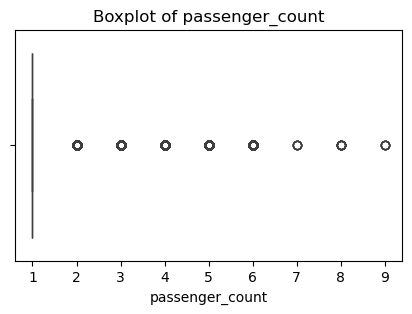

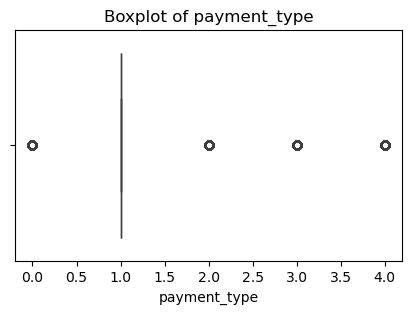

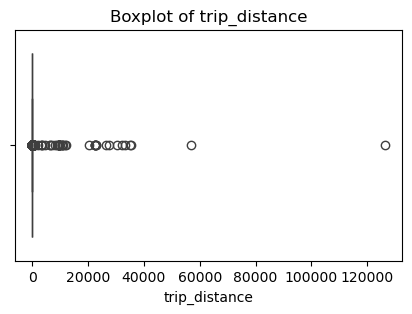

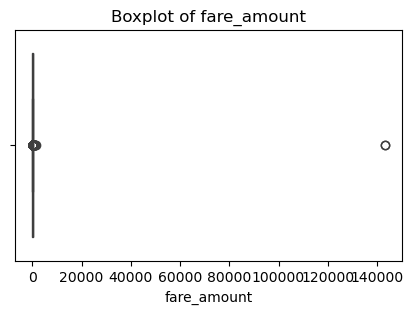

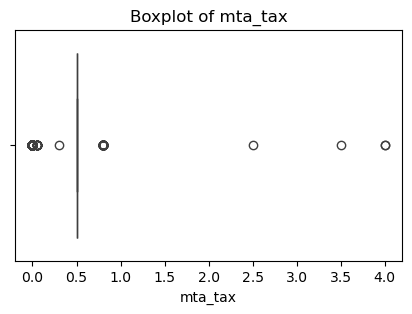

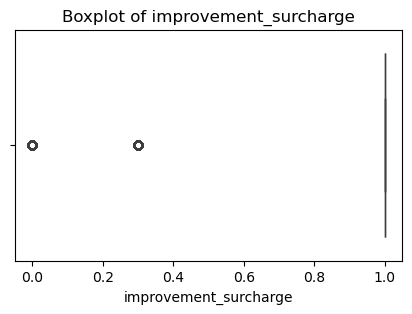

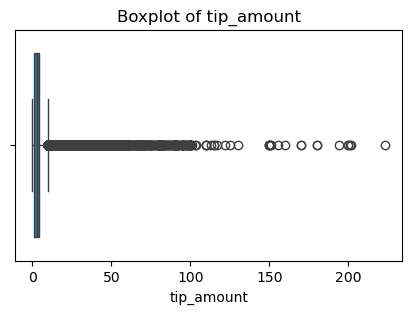

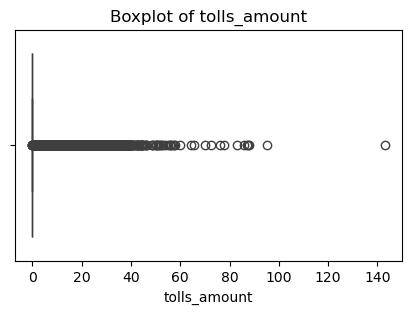

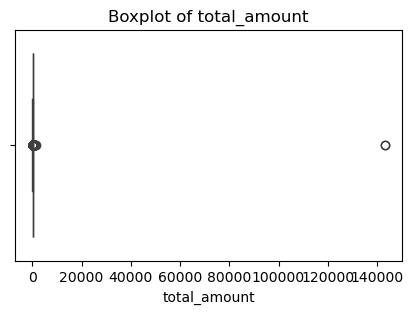

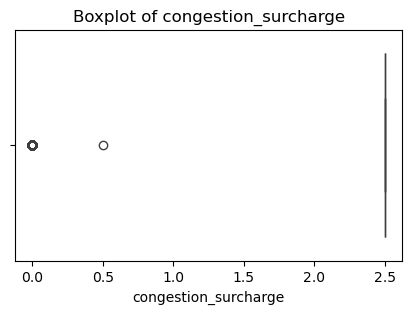

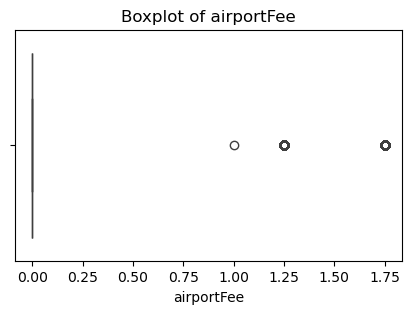

In [46]:
# Numeric columns to check
num_cols = ['passenger_count','payment_type','trip_distance','fare_amount','mta_tax','improvement_surcharge','tip_amount','tolls_amount','total_amount','congestion_surcharge','airportFee']

for col in num_cols:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=dfNoZeros[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [47]:
# remove passenger_count > 6

dfNoZeros.passenger_count.value_counts(dropna=False).sort_values(ascending=False)

passenger_count
1.0    1484761
2.0     279780
3.0      69639
4.0      38891
5.0      24083
6.0      16006
8.0         11
7.0          5
9.0          5
Name: count, dtype: int64

In [48]:
# remove passenger_count > 6
dfNoZeros = dfNoZeros[dfNoZeros.passenger_count<=6]
dfNoZeros.passenger_count.value_counts(dropna=False).sort_values(ascending=False)

passenger_count
1.0    1484761
2.0     279780
3.0      69639
4.0      38891
5.0      24083
6.0      16006
Name: count, dtype: int64

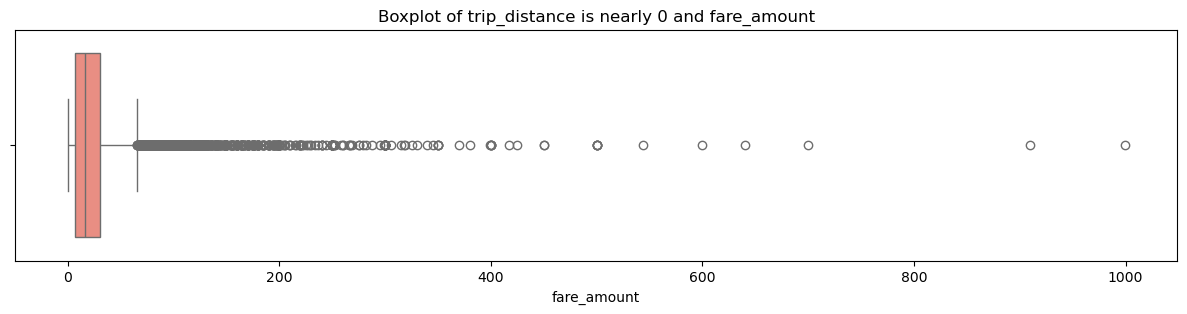

In [49]:
# Continue with outlier handling
# Entries where trip_distance is nearly 0 and fare_amount is more than 300

plt.figure(figsize=(15, 3))
sns.boxplot(x=dfNoZeros[(dfNoZeros.trip_distance == 0)]['fare_amount'],color='salmon')
plt.title(f'Boxplot of trip_distance is nearly 0 and fare_amount')
plt.show()


In [50]:
# Continue with outlier handling
#Remove entires where trip_distance is nearly 0 and fare_amount is more than 100


dfNoZeros = dfNoZeros[~((dfNoZeros.trip_distance == 0) & (dfNoZeros.fare_amount > 100))]


In [51]:
# Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different
# (both distance and fare should not be zero for different zones)

print("Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different",dfNoZeros[((dfNoZeros.trip_distance == 0) & (dfNoZeros.fare_amount == 0) & (dfNoZeros.PULocationID != dfNoZeros.DOLocationID))].shape[0])

dfNoZeros = dfNoZeros[~((dfNoZeros.trip_distance == 0) & (dfNoZeros.fare_amount == 0) & (dfNoZeros.PULocationID != dfNoZeros.DOLocationID))]

print("Entries after removing the outliers: ",dfNoZeros[((dfNoZeros.trip_distance == 0) & (dfNoZeros.fare_amount == 0) & (dfNoZeros.PULocationID != dfNoZeros.DOLocationID))].shape[0])


Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different 62
Entries after removing the outliers:  0


In [52]:
#Remove entries where trip_distance is more than 250 miles.
print("Entries where trip_distance is more than 250 miles: ",dfNoZeros[(dfNoZeros.trip_distance >250)].shape[0])

dfNoZeros = dfNoZeros[~(dfNoZeros.trip_distance >250)]

print("Entries after removing the outliers: ",dfNoZeros[(dfNoZeros.trip_distance >250)].shape[0])

Entries where trip_distance is more than 250 miles:  46
Entries after removing the outliers:  0


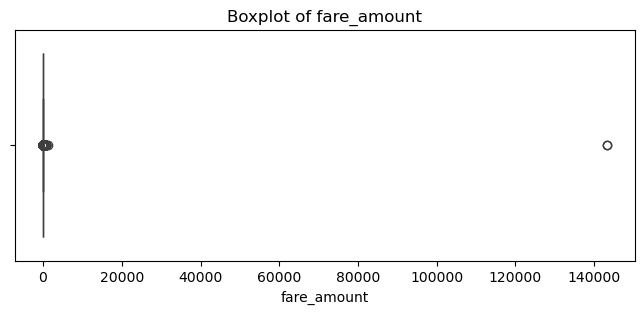

In [53]:
# Checking outliers in fare_amount

plt.figure(figsize=(8, 3))
sns.boxplot(x=dfNoZeros['fare_amount'])
plt.title(f'Boxplot of fare_amount')
plt.show()


In [54]:
# Checking outliers in fare_amount

dfNoZeros.loc[dfNoZeros['fare_amount'] > 1500, 'fare_amount'] = dfNoZeros['fare_amount'].mean()

dfNoZeros.fare_amount.sort_values(ascending=False)

1071754    1375.0
1435452     800.0
1701602     786.3
1633196     728.9
865721      720.0
            ...  
166370        0.0
1498339       0.0
475645        0.0
1293365       0.0
1204192       0.0
Name: fare_amount, Length: 1912419, dtype: float64

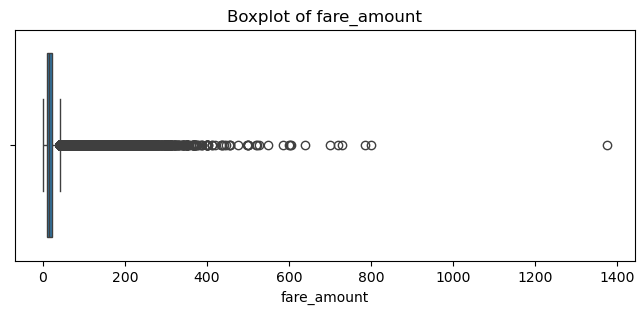

In [55]:
# Checking outliers in fare_amount

plt.figure(figsize=(8, 3))
sns.boxplot(x=dfNoZeros['fare_amount'])
plt.title(f'Boxplot of fare_amount')
plt.show()

In [56]:
# Do any columns need standardising?
print(dfNoZeros.payment_type.value_counts(dropna=False),"\n\n")
# We need to change entries where payment_type is 0 (there is no payment_type 0 defined in the data dictionary)

print("Total values with zero:",dfNoZeros[dfNoZeros['payment_type'] == 0]['payment_type'].shape[0])
dfNoZeros['payment_type'].replace(0, dfNoZeros['payment_type'].mode()[0], inplace=True)
print("After changing:",dfNoZeros[dfNoZeros['payment_type'] == 0]['payment_type'].shape[0])


print("\n\n",dfNoZeros.payment_type.value_counts(dropna=False))

payment_type
1    1505151
2     319108
0      65308
4      13782
3       9070
Name: count, dtype: int64 


Total values with zero: 65308
After changing: 0


 payment_type
1    1570459
2     319108
4      13782
3       9070
Name: count, dtype: int64


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [57]:
dfNoZeros.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airportFee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [58]:
#Categorical: VendorID, RatecodeID, PULocationID, DOLocationID, payment_type.

#Numeric: passenger_count, trip_distance and all monetary columns.

#Datetime: tpep_pickup_datetime, tpep_dropoff_datetime.

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

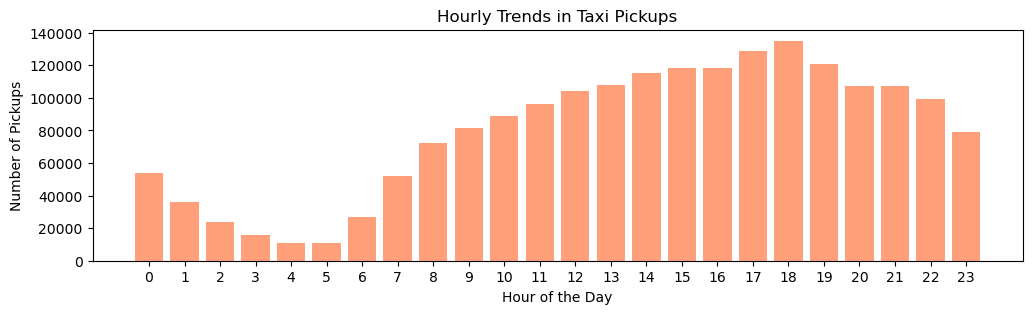

In [59]:
# Find and show the hourly trends in taxi pickups
# dfNoZeros.groupby('pickup_hour').size()

dfNoZeros['pickup_hour'] = dfNoZeros['tpep_pickup_datetime'].dt.hour


hourly_pickups = dfNoZeros.groupby('pickup_hour').size().reset_index(name='trip_count')

plt.figure(figsize=(12, 3))
plt.bar(hourly_pickups['pickup_hour'], hourly_pickups['trip_count'], color='lightsalmon')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.title('Hourly Trends in Taxi Pickups')
plt.xticks(range(24))
plt.show()

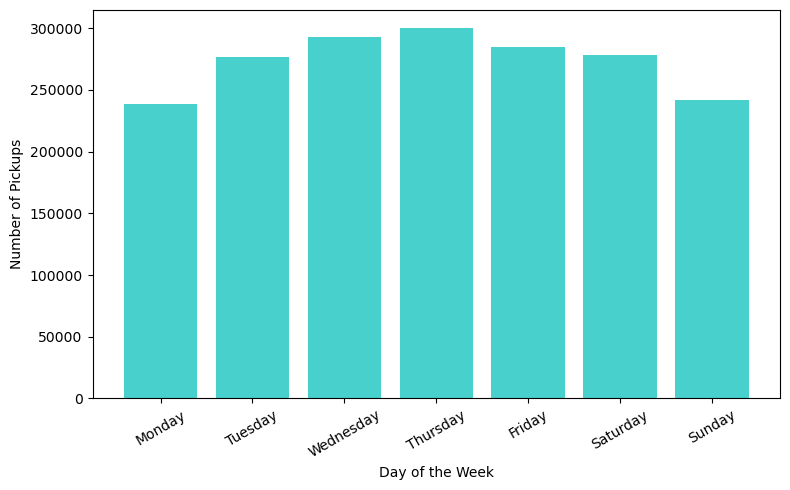

In [60]:
# Find and show the daily trends in taxi pickups (days of the week)
dfNoZeros['day_name'] = dfNoZeros['tpep_pickup_datetime'].dt.day_name()

plt.figure(figsize=(8, 5))

daily_pickups = dfNoZeros.groupby('day_name').size().reset_index(name='trip_count')
daily_pickups = daily_pickups.set_index('day_name').loc[["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]].reset_index()

plt.bar(daily_pickups['day_name'], daily_pickups['trip_count'], color='mediumturquoise')
plt.xlabel("Day of the Week")
plt.ylabel("Number of Pickups")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


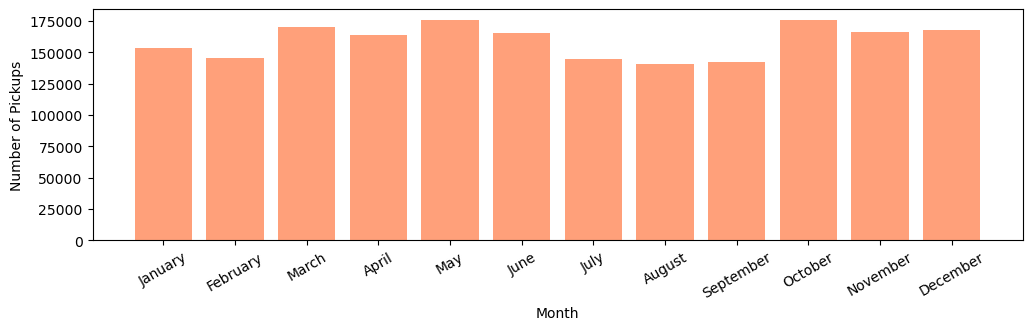

In [61]:
# Show the monthly trends in pickups


plt.figure(figsize=(12, 3))

dfNoZeros['month_name'] = dfNoZeros['tpep_pickup_datetime'].dt.month_name()

monthly_pickups = dfNoZeros.groupby('month_name').size().reset_index(name='trip_count')

monthly_pickups = monthly_pickups.set_index('month_name').loc[["January", "February", "March", "April", "May", "June","July", "August", "September", "October", "November", "December"]].reset_index()

plt.bar(monthly_pickups['month_name'], monthly_pickups['trip_count'], color='lightsalmon')
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.xticks(rotation=30)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [62]:
# Analyse the above parameters

verify_cols = ["fare_amount", "tip_amount", "total_amount","trip_distance" ]

for col in verify_cols:
    zero_count = (dfNoZeros[col] == 0).sum()
    if zero_count > 0:
        print(f"Column '{col}' has {zero_count} Zero values.")

    negative_count = (dfNoZeros[col] < 0).sum()
    if negative_count > 0:
        print(f"Column '{col}' has {negative_count} negative values.") #No negative values found

#tip amount can be zero, trip distance can be zero for same place pick up and drop, Fair amount and Total Amount sould not be zero

Column 'fare_amount' has 581 Zero values.
Column 'tip_amount' has 439358 Zero values.
Column 'total_amount' has 328 Zero values.
Column 'trip_distance' has 37315 Zero values.


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [63]:
# Create a dfNoZeros with non zero entries for the selected parameters.

print("Rows in dfNoZeros:",dfNoZeros.shape[0])
dfNoZerosNoZeros = dfNoZeros[(dfNoZeros['fare_amount'] > 0) & (dfNoZeros['total_amount'] > 0)].copy()
print("Rows in dfNoZerosNoZeros:",dfNoZerosNoZeros.shape[0])

Rows in dfNoZeros: 1912419
Rows in dfNoZerosNoZeros: 1911838


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

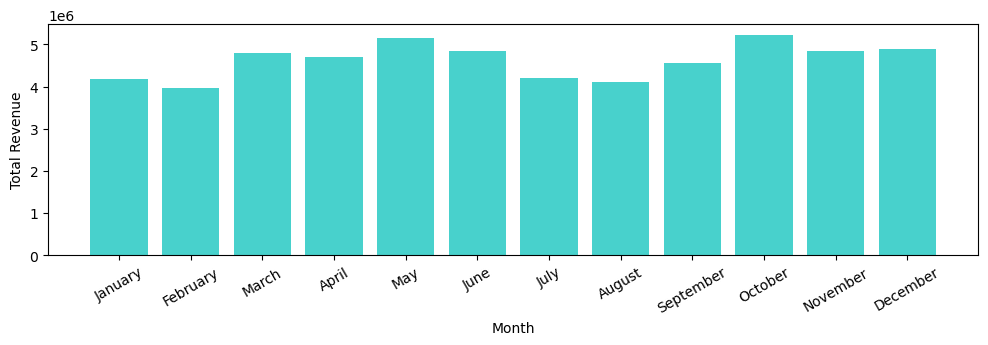

In [64]:
# Group data by month and analyse monthly revenue

dfNoZerosNoZeros['month'] = dfNoZerosNoZeros['tpep_pickup_datetime'].dt.month_name()

monthly_revenue = dfNoZerosNoZeros.groupby('month')['total_amount'].sum().reset_index(name='monthly_revenue')

monthly_revenue = monthly_revenue.set_index('month').loc[["January", "February", "March", "April", "May", "June","July", "August", "September", "October", "November", "December"]].reset_index()

plt.figure(figsize=(12, 3))
plt.bar(monthly_revenue['month'], monthly_revenue['monthly_revenue'], color='mediumturquoise')
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=30)
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

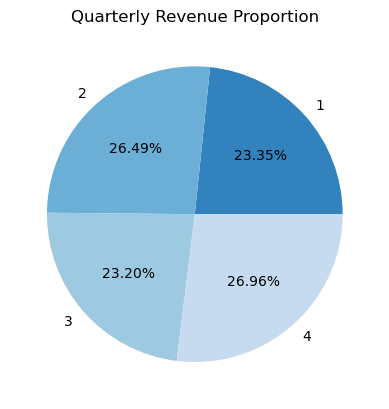

In [65]:
# Calculate proportion of each quarter

dfNoZerosNoZeros['quarter'] = dfNoZerosNoZeros['tpep_pickup_datetime'].dt.quarter

quarterly = dfNoZerosNoZeros.groupby('quarter')['total_amount'].sum().reset_index()

total = quarterly['total_amount'].sum()

quarterly['proportion'] = (quarterly['total_amount'] / total) * 100

plt.pie(quarterly['total_amount'], labels=quarterly['quarter'],autopct='%.2f%%', colors=plt.cm.tab20c.colors)
plt.title("Quarterly Revenue Proportion")
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

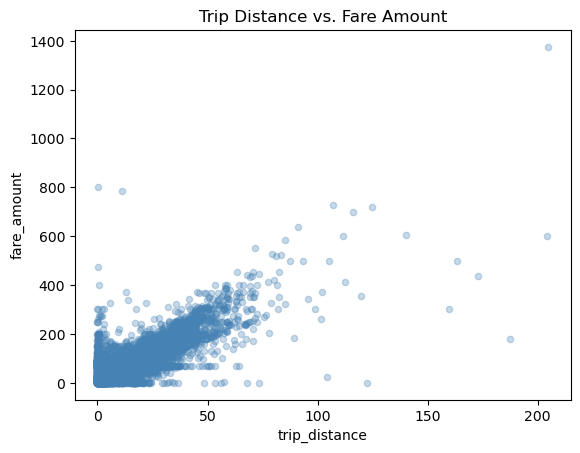

In [66]:
# Show how trip fare is affected by distance

df5 = dfNoZeros[dfNoZeros['trip_distance'] > 0]

df5.plot.scatter(x='trip_distance', y='fare_amount', alpha=0.3, color='steelblue')
plt.title("Trip Distance vs. Fare Amount")
plt.show()

In [67]:
corr_value = df5['trip_distance'].corr(df5['fare_amount'])
print('Strong Coorlation:',corr_value.round(2))

Strong Coorlation: 0.94


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and `trip duration` (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

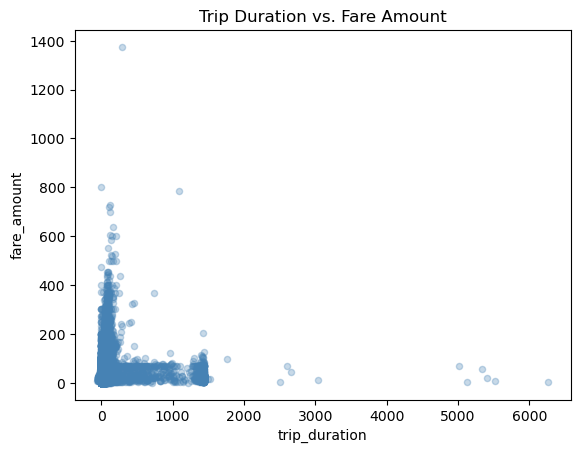

In [68]:
# Show relationship between fare and trip duration

dfNoZeros['trip_duration'] = (dfNoZeros['tpep_dropoff_datetime'] - dfNoZeros['tpep_pickup_datetime']).dt.total_seconds() / 60

dfNoZeros.plot.scatter(x='trip_duration', y='fare_amount', alpha=0.3, color='steelblue')
plt.title("Trip Duration vs. Fare Amount")
plt.show()

In [69]:
# Show the Posetive correlation between fare_amount and trip duration

corr_fare_duration = dfNoZeros['trip_duration'].corr(dfNoZeros['fare_amount'])
print("Correlation between fare_amount and trip_duration:", corr_fare_duration.round(2))

Correlation between fare_amount and trip_duration: 0.27


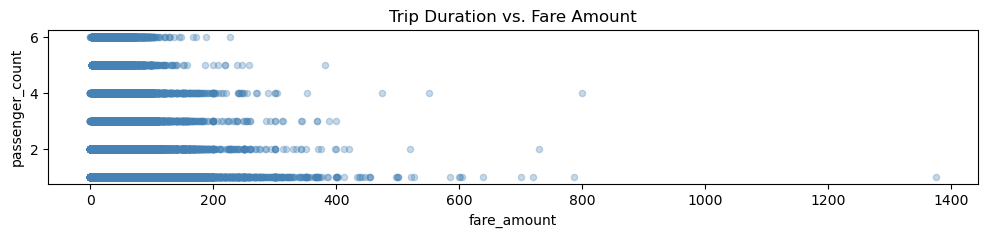

In [70]:
# Show relationship between fare and number of passengers

dfNoZeros.plot.scatter(y='passenger_count', x='fare_amount', alpha=0.3, figsize=(12, 2), color='steelblue')
plt.title("Trip Duration vs. Fare Amount")
plt.show()

In [71]:
# Show weak correlation between fare_amount and passenger_count

corr_val = dfNoZeros['passenger_count'].corr(dfNoZeros['fare_amount'])
print("Correlation between fare_amount and passenger_count is very low:", corr_val.round(2))

Correlation between fare_amount and passenger_count is very low: 0.04


Text(0.5, 1.0, 'Fare Amount Distribution by Passenger Count')

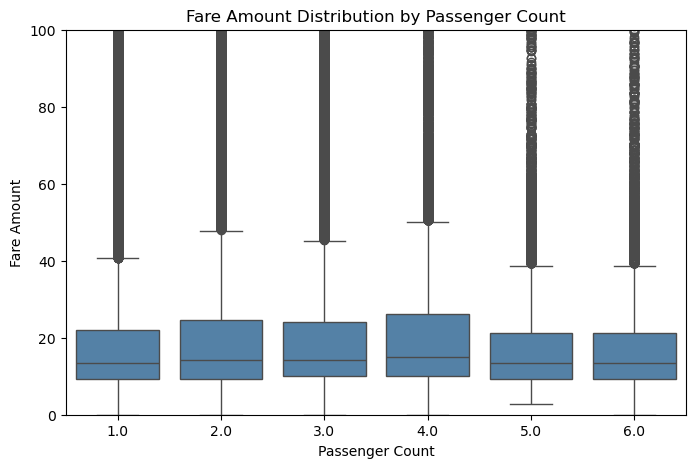

In [72]:
plt.figure(figsize=(8,5))
sns.boxplot(x='passenger_count', y='fare_amount', data=dfNoZeros, color='steelblue')
plt.ylim(0, 100)
# Labels and title
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount")
plt.title("Fare Amount Distribution by Passenger Count")

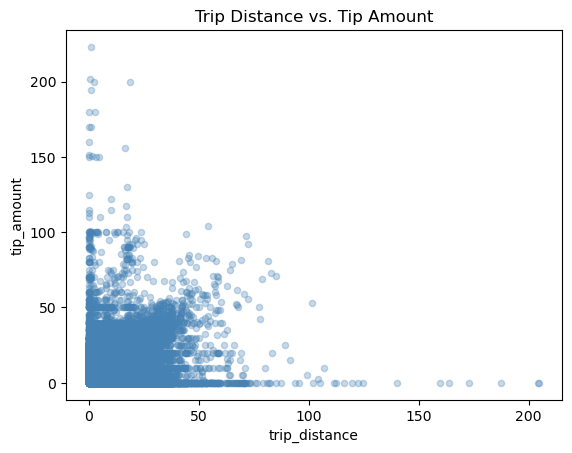

In [73]:
# Show relationship between tip and trip distance

dfNoZeros.plot.scatter(x='trip_distance', y='tip_amount', alpha=0.3, color='steelblue')
plt.title("Trip Distance vs. Tip Amount")
plt.show()

In [74]:
# Show postive correlation between trip_distance and tip_amount

corr_value = dfNoZeros['trip_distance'].corr(df5['tip_amount'])
print("Correlation between fare_amount and trip_duration is Positive:", corr_value.round(2))

Correlation between fare_amount and trip_duration is Positive: 0.59


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

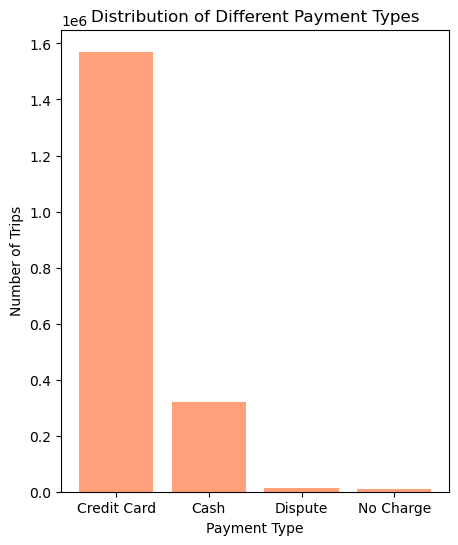

In [75]:
# Analyse the distribution of different payment types (payment_type).

payment_map = {1: "Credit Card",2: "Cash",3: "No Charge",4: "Dispute"}

dfNoZeros['payment_label'] = dfNoZeros['payment_type'].map(payment_map)

payment_distribution = dfNoZeros['payment_label'].value_counts().reset_index()
payment_distribution.columns = ['payment_label', 'count']

plt.figure(figsize=(5, 6))
plt.bar(payment_distribution['payment_label'], payment_distribution['count'], color='lightsalmon')
plt.title("Distribution of Different Payment Types")
plt.xlabel("Payment Type")
plt.ylabel("Number of Trips")
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [76]:
!pip install geopandas

Defaulting to user installation because normal site-packages is not writeable


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [77]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file(r'C:\Users\Ranjith\Downloads\Upgrad\NYC Yellow Taxi Datasets\Datasets and Dictionary\taxi_zones\taxi_zones.shp')
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

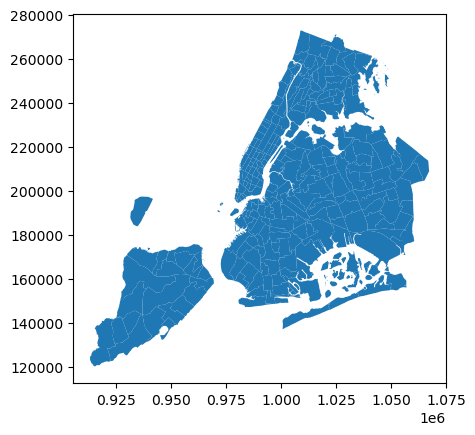

In [78]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [79]:
# Merge zones and trip records using locationID and PULocationID
merged_df = pd.merge(dfNoZeros,zones, left_on='PULocationID', right_on='LocationID', how='left')


merged_df.head(2)



,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,month_name,trip_duration,payment_label,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,2,...,January,15.950000,Cash,138.0,0.107467,0.000537,LaGuardia Airport,138.0,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031..."
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,1,...,January,5.083333,Credit Card,161.0,0.035804,0.000072,Midtown Center,161.0,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21..."


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [80]:
# Group data by location and calculate the number of trips

location_trip_counts = dfNoZeros.groupby('PULocationID').size().reset_index(name='trip_count')

print(location_trip_counts.sort_values(by='trip_count', ascending=False).head())


     PULocationID  trip_count
125           132       97899
229           237       89443
154           161       88389
228           236       80486
155           162       67235


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [81]:
# Merge trip counts back to the zones GeoDataFrame

zones = pd.merge(zones, location_trip_counts, left_on='LocationID', right_on='PULocationID', how='left')

zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,trip_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",1.0,130.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2.0,2.0
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",3.0,45.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",4.0,2381.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",5.0,13.0


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

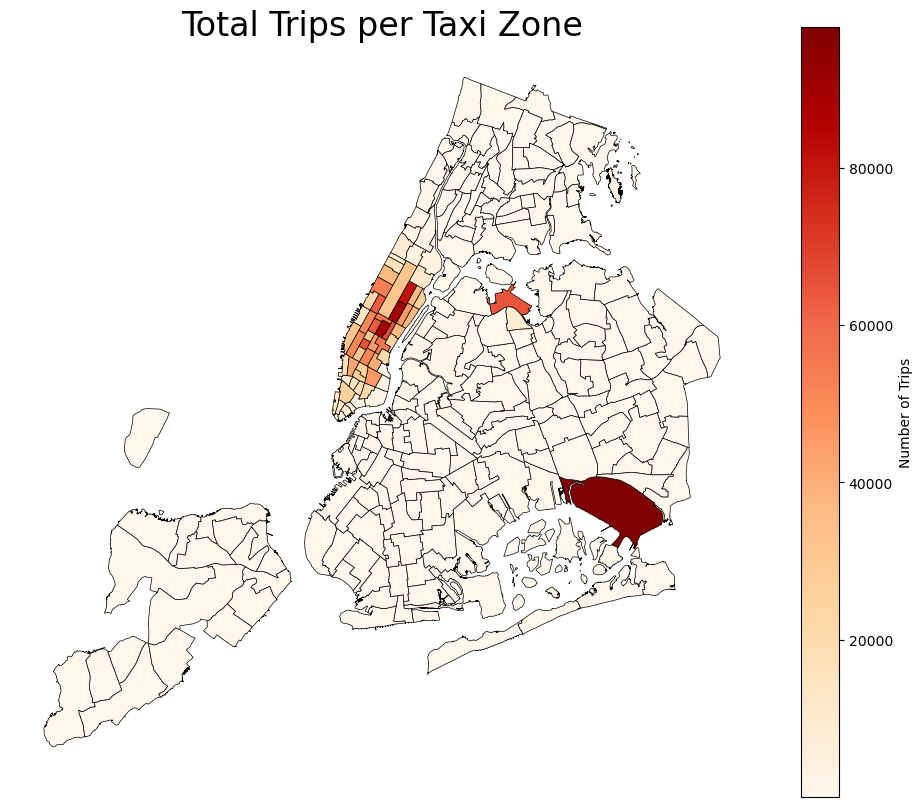

In [89]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones.plot(column='trip_count', cmap='OrRd', ax=ax, legend = True, linewidth=0.5, edgecolor='black', legend_kwds={'label': "Number of Trips", 'orientation': "vertical"})

ax.set_title("Total Trips per Taxi Zone", fontsize=24)
ax.axis("off")
plt.show()

In [83]:
# can you try displaying the zones dfNoZeros sorted by the number of trips?

sortedZones = zones.sort_values(by='trip_count', ascending=False)

sortedZones[['zone', 'borough', 'trip_count']].head(20)

,zone,borough,trip_count
131,JFK Airport,Queens,97899.0
236,Upper East Side South,Manhattan,89443.0
160,Midtown Center,Manhattan,88389.0
235,Upper East Side North,Manhattan,80486.0
161,Midtown East,Manhattan,67235.0
137,LaGuardia Airport,Queens,65011.0
185,Penn Station/Madison Sq West,Manhattan,64887.0
229,Times Sq/Theatre District,Manhattan,63200.0
141,Lincoln Square East,Manhattan,63194.0
169,Murray Hill,Manhattan,56423.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [90]:
# Find routes which have the slowest speeds at different times of the day


dfNoZeros = dfNoZeros[dfNoZeros['tpep_dropoff_datetime'] >= dfNoZeros['tpep_pickup_datetime']]#Drop time should always be greater than pickup time, so filtering those out
dfNoZeros = dfNoZeros[dfNoZeros['trip_distance']!=0] #Drop the entires where trip distance is zero which doesn't make sense for speed calculation

dfNoZeros['pickup_hour'] = dfNoZeros['tpep_pickup_datetime'].dt.hour

dfNoZeros['trip_duration_hours'] = (dfNoZeros['tpep_dropoff_datetime'] - dfNoZeros['tpep_pickup_datetime']).dt.total_seconds() / 3600

dfNoZeros['trip_duration_hours'] = dfNoZeros['trip_duration_hours'].replace(0, float('nan'))

dfNoZeros['speed_mph'] = dfNoZeros['trip_distance'] / dfNoZeros['trip_duration_hours']

dfNoZeros = dfNoZeros[dfNoZeros['speed_mph']<200]

slow_routes = dfNoZeros.groupby(['PULocationID', 'DOLocationID', 'pickup_hour'])['speed_mph'].mean().reset_index()

slow_routes_sorted = slow_routes.sort_values(by='speed_mph', ascending=True)

print(slow_routes_sorted)

        PULocationID  DOLocationID  pickup_hour   speed_mph
107317           232            65           13    0.005324
120327           243           264           17    0.007772
9259              43            10           10    0.022236
126327           258           258            1    0.026230
120305           243           243           23    0.028659
...              ...           ...          ...         ...
93026            188           188           22  135.000000
2004              12            12           19  151.578947
86579            168           168           20  160.000000
100454           228            71           10  189.473684
133445           265           264           14  192.000000

[133471 rows x 4 columns]


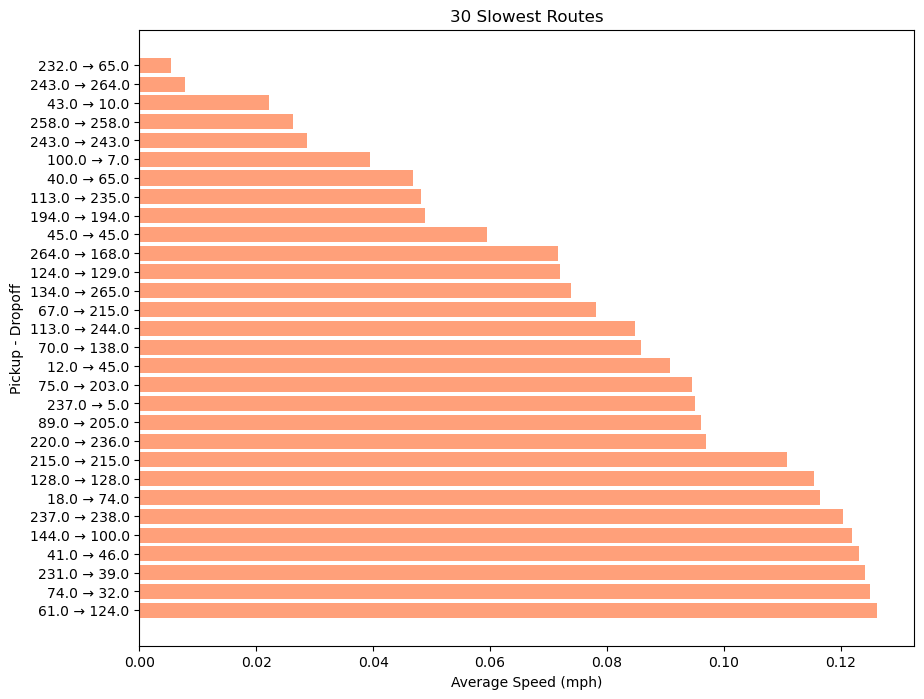

In [93]:
top_slow_routes = slow_routes_sorted.head(30)


top_slow_routes['route_label'] = top_slow_routes.apply(lambda row: f"{row['PULocationID']} → {row['DOLocationID']}", axis=1)


plt.figure(figsize=(10, 8))
plt.barh(top_slow_routes['route_label'], top_slow_routes['speed_mph'], color='lightsalmon')
plt.xlabel("Average Speed (mph)")
plt.ylabel("Pickup - Dropoff")
plt.title("30 Slowest Routes")
plt.gca().invert_yaxis()
plt.show()

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

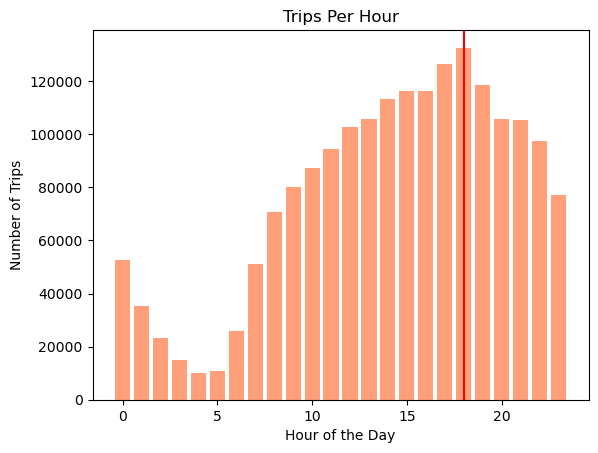

The busiest hour is 18 with 132563 trips.


In [95]:
# Visualise the number of trips per hour and find the busiest hour
trips_per_hour = dfNoZeros['pickup_hour'].value_counts().sort_index()

#print(trips_per_hour)

busiest_hour = trips_per_hour.idxmax()
busiest_trips = trips_per_hour.max()

plt.bar(trips_per_hour.index, trips_per_hour.values, color='lightsalmon')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Trips Per Hour')
plt.axvline(busiest_hour, color='Red')
plt.show()

print(f"The busiest hour is {busiest_hour} with {busiest_trips} trips.")

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [97]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05

trips_per_hour = dfNoZeros['pickup_hour'].value_counts()

busiest_hours = trips_per_hour.nlargest(5)
print(busiest_hours)

actual_trips = busiest_hours / sample_fraction

print(actual_trips)


pickup_hour
18    132563
17    126446
19    118618
15    116355
16    116303
Name: count, dtype: int64
pickup_hour
18    2651260.0
17    2528920.0
19    2372360.0
15    2327100.0
16    2326060.0
Name: count, dtype: float64


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

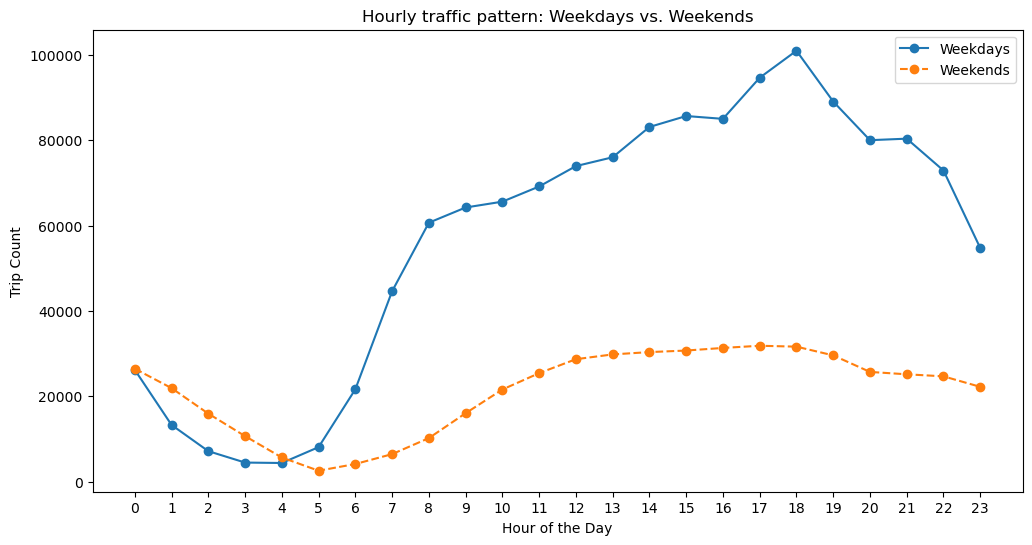

In [103]:
# Compare traffic trends for the week days and weekends

# Compare traffic trends for the week days and weekends
dfNoZeros['is_weekend'] = dfNoZeros['day_name'].isin(['Saturday', 'Sunday'])

weekday_trips = dfNoZeros[~dfNoZeros['is_weekend']].groupby('pickup_hour').size()
weekend_trips = dfNoZeros[dfNoZeros['is_weekend']].groupby('pickup_hour').size()

plt.figure(figsize=(12, 6))
plt.plot(weekday_trips.index, weekday_trips.values, label='Weekdays', marker='o', linestyle='-')
plt.plot(weekend_trips.index, weekend_trips.values, label='Weekends', marker='o', linestyle='--')

plt.xlabel('Hour of the Day')
plt.ylabel('Trip Count')
plt.title('Hourly traffic pattern: Weekdays vs. Weekends')
plt.legend()
plt.xticks(range(24))

plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

In [108]:
print("Weekdays have clear peaks in the morning and evening, likely due to work travel. \nOn weekends, travel is more spread out, with more activity in the evenings.\nKnowing the busy and quiet times can help with better planning and travel decisions.")

Weekdays have clear peaks in the morning and evening, likely due to work travel. 
On weekends, travel is more spread out, with more activity in the evenings.
Knowing the busy and quiet times can help with better planning and travel decisions.


**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [113]:
# Find top 10 pickup and dropoff zones

top_pickup_zones = df5['PULocationID'].value_counts().nlargest(10)
top_dropoff_zones = df5['DOLocationID'].value_counts().nlargest(10)

pickup_data = df5[df5['PULocationID'].isin(top_pickup_zones.index)]
dropoff_data = df5[df5['DOLocationID'].isin(top_dropoff_zones.index)]

pickup_trends = pickup_data.groupby(['pickup_hour', 'PULocationID']).size().unstack()
dropoff_trends = dropoff_data.groupby(['pickup_hour', 'DOLocationID']).size().unstack()

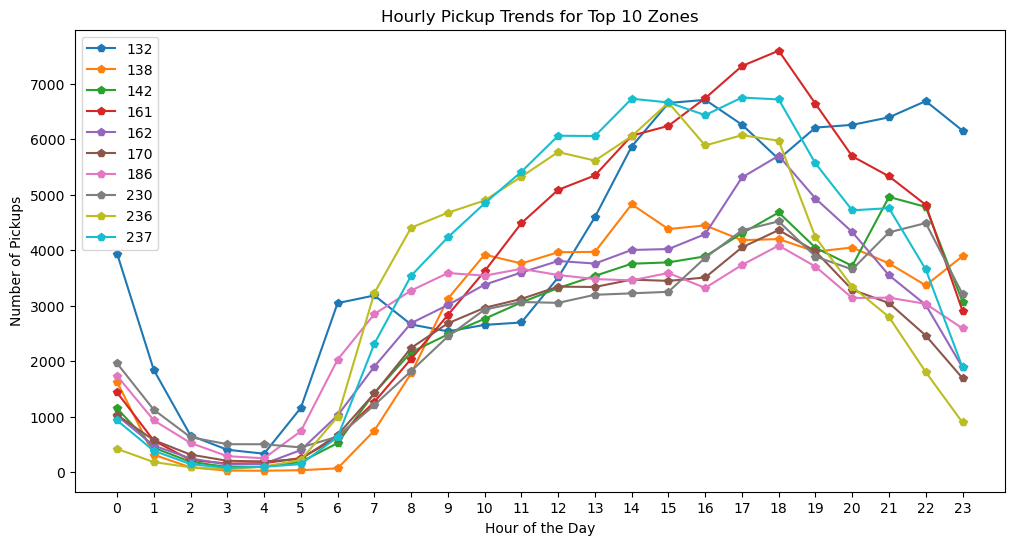

In [114]:
#Pickup trend
plt.figure(figsize=(12, 6))
pickup_trends.plot(ax=plt.gca(), marker='p')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.title('Hourly Pickup Trends for Top 10 Zones')
plt.legend()
plt.xticks(range(24))
plt.show()

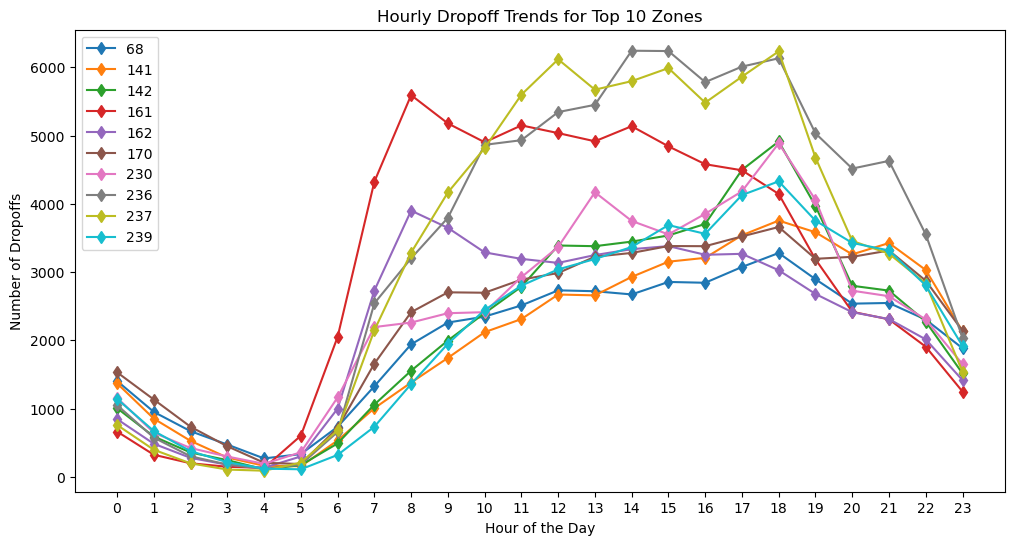

In [115]:
#DrofOff Trends
plt.figure(figsize=(12,6))
dropoff_trends.plot(ax=plt.gca(),marker='d')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Dropoffs')
plt.title('Hourly Dropoff Trends for Top 10 Zones')
plt.legend()
plt.xticks(range(24))
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [118]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = df5['PULocationID'].value_counts()
dropoff_counts = df5['DOLocationID'].value_counts()

pickup_drop_ratio = pd.DataFrame({'pickup_count': pickup_counts, 'dropoff_count': dropoff_counts})

#pickup_drop_ratio.isna().sum()
pickup_drop_ratio.fillna(0, inplace=True)

pickup_drop_ratio['pickup_drop_ratio'] = pickup_drop_ratio['pickup_count'] / pickup_drop_ratio['dropoff_count'].replace(0, float('inf'))

In [119]:
print(pickup_drop_ratio.nlargest(10,'pickup_drop_ratio'))

     pickup_count  dropoff_count  pickup_drop_ratio
70         8332.0          909.0           9.166117
132       96054.0        21258.0           4.518487
138       64527.0        24252.0           2.660688
186       64240.0        40991.0           1.567173
114       24903.0        18089.0           1.376693
43        31371.0        22863.0           1.372130
249       41639.0        31262.0           1.331937
162       66624.0        53470.0           1.246007
161       87433.0        73494.0           1.189662
100       30639.0        25758.0           1.189495


In [120]:
print(pickup_drop_ratio.nsmallest(10,'pickup_drop_ratio'))

     pickup_count  dropoff_count  pickup_drop_ratio
30            0.0           18.0           0.000000
99            0.0            3.0           0.000000
109           0.0           26.0           0.000000
176           0.0           13.0           0.000000
199           2.0            0.0           0.000000
221           0.0           35.0           0.000000
1            49.0         5602.0           0.008747
27            1.0           38.0           0.026316
251           1.0           34.0           0.029412
245           1.0           32.0           0.031250


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [122]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

# Filter for night hours (11 PM to 5 AM)
night_data = df5[df5['pickup_hour'].isin([23, 0, 1, 2, 3, 4, 5])]

In [123]:
#Top pickup Zones during the night
print(night_data['PULocationID'].value_counts().nlargest(10))

PULocationID
79     16147
132    14491
249    12926
48     10701
148    10038
114     9043
230     8378
186     7063
164     6349
68      6235
Name: count, dtype: int64


In [125]:
#Top dropoff Zones during the night
print(night_data['DOLocationID'].value_counts().nlargest(10))

DOLocationID
79     8543
48     7094
170    6382
68     5988
107    5861
141    5484
263    5208
249    5044
230    4728
239    4554
Name: count, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [139]:
#Top pickup Zones during the night
print(night_data['PULocationID'].value_counts().nlargest(10))


PULocationID
79     16147
132    14491
249    12926
48     10701
148    10038
114     9043
230     8378
186     7063
164     6349
68      6235
Name: count, dtype: int64


In [140]:
# Filter for night hours (11 PM to 5 AM)
night_data = df5[df5['pickup_hour'].isin([23, 0, 1, 2, 3, 4, 5])]
day_data = df5[~df5['pickup_hour'].isin([23, 0, 1, 2, 3, 4, 5])]

night_revenue = night_data['total_amount'].sum() + night_data['tip_amount'].sum()
day_revenue = day_data['total_amount'].sum() + day_data['tip_amount'].sum()

revenue_share_night = night_revenue / (night_revenue + day_revenue)
revenue_share_day = day_revenue / (night_revenue + day_revenue)

"Night Revenue Share",
print("Night Revenue Share:",(revenue_share_night*100).round(2))#12 Percent

print("Day Revenue Share:",(revenue_share_day*100).round(2))#Almost 90 percent


Night Revenue Share: 12.07
Day Revenue Share: 87.93


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [142]:
# Analyse the fare per mile per passenger for different passenger counts

df5['passenger_count'] = df5['passenger_count'].replace(0, float('nan'))

df5['fare_per_mile'] = df5['fare_amount'] / df5['trip_distance']

df5['fare_per_mile_per_passenger'] = df5['fare_per_mile'] / df5['passenger_count']

fareperkm = df5.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

fareperkm


,passenger_count,fare_per_mile_per_passenger
0,1.0,10.828139
1,2.0,6.425534
2,3.0,3.897342
3,4.0,4.453859
4,5.0,1.708753
5,6.0,1.350456


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [145]:
# Compare the average fare per mile for different days and for different times of the day

df5['fare_per_mile'] = df5['fare_amount'] / df5['trip_distance']

fare_per_mile_by_hour_day = df5.groupby(['day_name', 'pickup_hour'])['fare_per_mile'].mean().reset_index()

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
fare_per_mile_by_hour_day['day_name'] = pd.Categorical(fare_per_mile_by_hour_day['day_name'], categories=day_order, ordered=True)

print(fare_per_mile_by_hour_day)

      day_name  pickup_hour  fare_per_mile
0       Friday            0       8.333754
1       Friday            1      11.337190
2       Friday            2      10.943470
3       Friday            3      12.411163
4       Friday            4      16.835753
..         ...          ...            ...
163  Wednesday           19      11.885696
164  Wednesday           20      10.565205
165  Wednesday           21       8.168580
166  Wednesday           22       9.929964
167  Wednesday           23       9.171072

[168 rows x 3 columns]


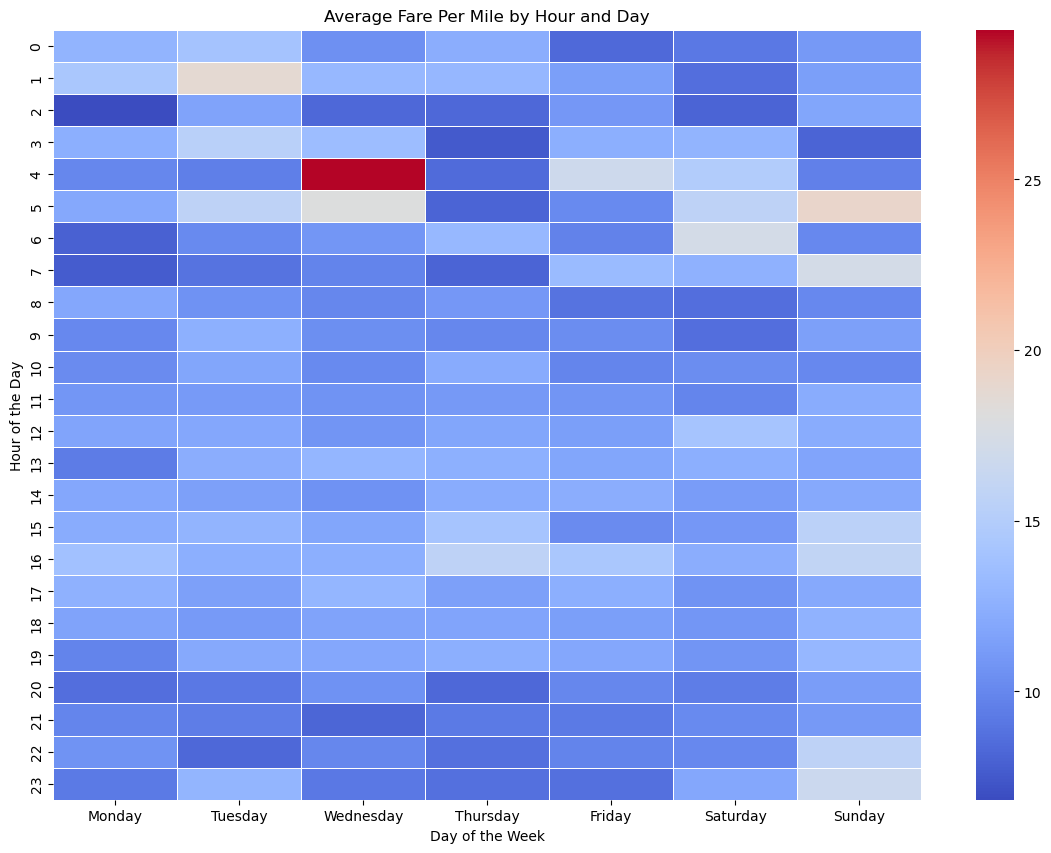

In [148]:
heatmap_data = fare_per_mile_by_hour_day.pivot(index="pickup_hour", columns="day_name", values="fare_per_mile")

plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=False, linewidths=0.5)
plt.xlabel("Day of the Week")
plt.ylabel("Hour of the Day")
plt.title("Average Fare Per Mile by Hour and Day")
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [152]:
# Compare fare per mile for different vendors

vendor_fare_comparison = df5.groupby(['VendorID', 'pickup_hour'])['fare_per_mile'].mean().reset_index()

#print(df5['VendorID'].value_counts())
print(vendor_fare_comparison[vendor_fare_comparison['VendorID'] == 1])
print(vendor_fare_comparison[vendor_fare_comparison['VendorID'] == 6])
print(vendor_fare_comparison[vendor_fare_comparison['VendorID'] == 2])

    VendorID  pickup_hour  fare_per_mile
0          1            0       6.795508
1          1            1       7.043503
2          1            2       6.921831
3          1            3       6.503791
4          1            4       7.481739
5          1            5       6.961495
6          1            6       6.643675
7          1            7       7.207661
8          1            8       8.064102
9          1            9       8.388781
10         1           10       8.405133
11         1           11       8.717205
12         1           12       8.834829
13         1           13       8.727957
14         1           14       8.649003
15         1           15       8.809598
16         1           16       8.826056
17         1           17       8.655687
18         1           18       8.451874
19         1           19       7.928745
20         1           20       7.456843
21         1           21       7.307866
22         1           22       7.009699
23         1    

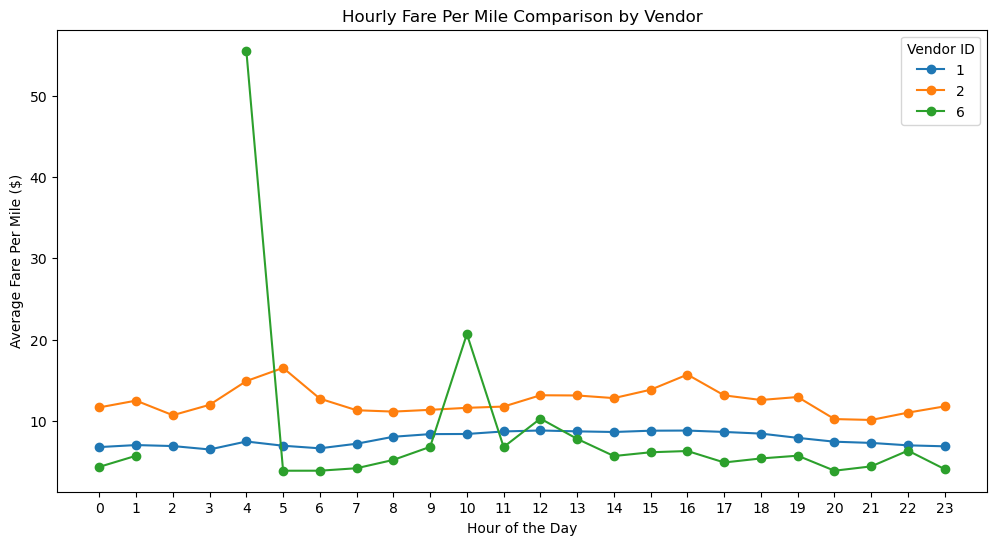

In [153]:
plt.figure(figsize=(12, 6))
vendor_fare_comparison.pivot(index='pickup_hour', columns='VendorID', values='fare_per_mile').plot(ax=plt.gca(), marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare Per Mile ($)')
plt.title('Hourly Fare Per Mile Comparison by Vendor')
plt.legend(title="Vendor ID")
plt.xticks(range(24))
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [154]:
# Defining distance tiers

df5['distance_tier'] = df5['trip_distance'].apply(lambda d: "0-2 miles" if d <= 2 else "2-5 miles" if d <= 5 else "More than 5 miles")

print(df5.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index())

   VendorID      distance_tier  fare_per_mile
0         1          0-2 miles       9.907239
1         1          2-5 miles       6.379866
2         1  More than 5 miles       4.423497
3         2          0-2 miles      18.033663
4         2          2-5 miles       6.537903
5         2  More than 5 miles       4.489912
6         6          0-2 miles      32.422471
7         6          2-5 miles       8.107119
8         6  More than 5 miles       4.375864


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [155]:
#  Analyze tip percentages based on distances, passenger counts and pickup times

df5['tip_percent'] = (df5['tip_amount'] / df5['fare_amount']) * 100

In [161]:
print(df5.groupby('trip_distance')['tip_percent'].mean())

trip_distance
0.01      13.402710
0.02       7.506488
0.03       8.700780
0.04       6.662063
0.05      19.010326
            ...    
163.52     0.000000
172.71     0.000000
187.35     0.083333
204.10     0.000000
204.86     0.000000
Name: tip_percent, Length: 4070, dtype: float64


In [157]:
print(df5.groupby('passenger_count')['tip_percent'].mean().reset_index())

   passenger_count  tip_percent
0              1.0          inf
1              2.0          inf
2              3.0          inf
3              4.0    17.439967
4              5.0    20.482426
5              6.0    20.605786


In [158]:
print(df5.groupby('pickup_hour')['tip_percent'].mean().reset_index())

    pickup_hour  tip_percent
0             0    20.279363
1             1    20.428140
2             2    20.371243
3             3    20.204980
4             4    18.033139
5             5    17.463098
6             6    18.320770
7             7    19.498066
8             8    19.910795
9             9    19.643481
10           10          inf
11           11    19.165595
12           12          inf
13           13    19.032316
14           14    18.990578
15           15          inf
16           16          inf
17           17          inf
18           18          inf
19           19    22.038521
20           20    21.386627
21           21          inf
22           22          inf
23           23    20.449657


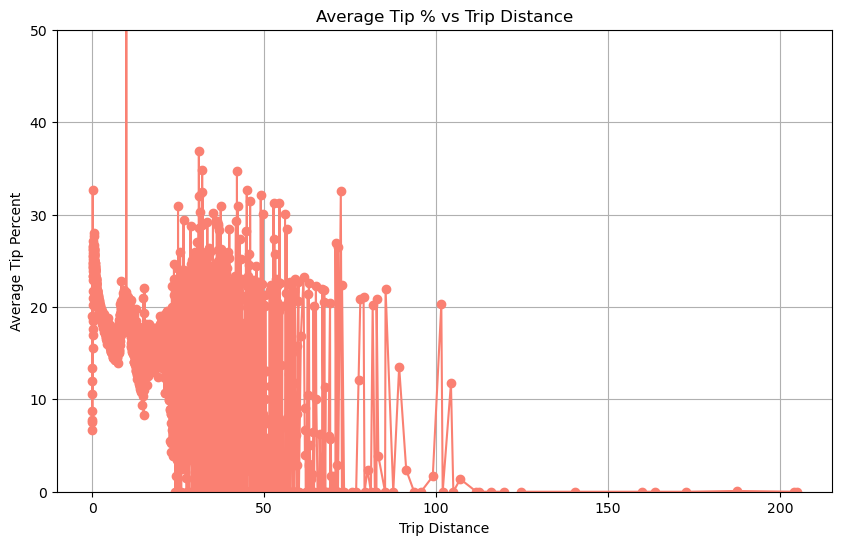

In [177]:
tip_by_distance = df5.groupby('trip_distance')['tip_percent'].mean()


plt.figure(figsize=(10, 6))
plt.plot(tip_by_distance.index, tip_by_distance.values, marker='o', linestyle='-', color='salmon')
plt.xlabel("Trip Distance")
plt.ylabel("Average Tip Percent")
plt.title("Average Tip % vs Trip Distance")
plt.ylim(0, 50)
plt.grid(True)
plt.show()



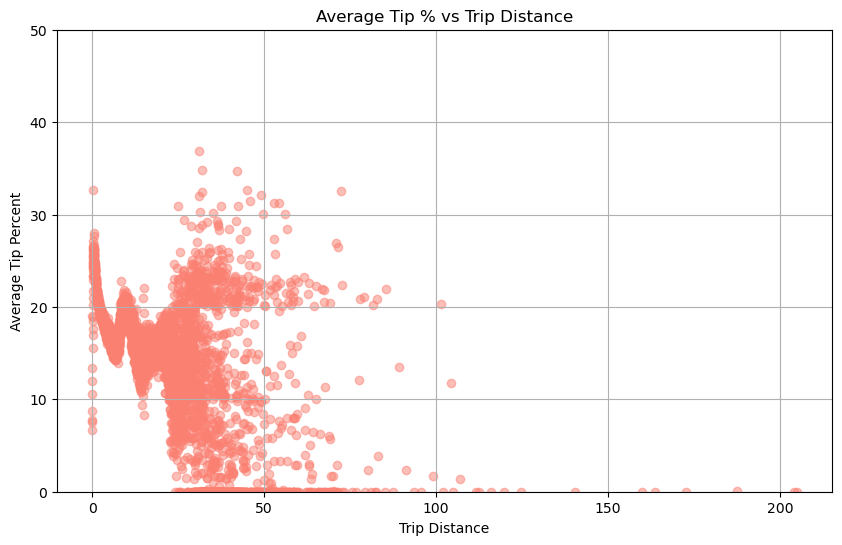

In [175]:
plt.figure(figsize=(10, 6))
plt.scatter(tip_by_distance.index, tip_by_distance.values, alpha=0.5, color='salmon')
plt.xlabel("Trip Distance")
plt.ylabel("Average Tip Percent")
plt.title("Average Tip % vs Trip Distance")
plt.ylim(0, 50)
plt.grid(True)
plt.show()

In [172]:
print("Here, pick up hours does not affecyt the tip.\nThe Higher passenger count results in higher tip.\nLonger Trip time makes people tip less.")

Here, pick up hours does not affecyt the tip.
The Higher passenger count results in higher tip.
Longer Trip time makes people tip less.


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [178]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

low_tip_trips = df5[df5['tip_percent'] < 10]
high_tip_trips = df5[df5['tip_percent'] > 25]

print(low_tip_trips.groupby('trip_distance')['tip_percent'].mean().reset_index())

print(low_tip_trips.groupby('passenger_count')['tip_percent'].mean().reset_index())

      trip_distance  tip_percent
0              0.01     0.197867
1              0.02     0.150600
2              0.03     0.125884
3              0.04     0.233135
4              0.05     0.271578
...             ...          ...
3633         163.52     0.000000
3634         172.71     0.000000
3635         187.35     0.083333
3636         204.10     0.000000
3637         204.86     0.000000

[3638 rows x 2 columns]
   passenger_count  tip_percent
0              1.0     1.138533
1              2.0     0.970938
2              3.0     0.845433
3              4.0     0.633017
4              5.0     1.063589
5              6.0     1.105660


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [179]:
# See how passenger count varies across hours and days

passenger_by_hour = df5.groupby('pickup_hour')['passenger_count'].mean().reset_index()

passenger_by_day = df5.groupby('day_name')['passenger_count'].mean().reset_index()

passenger_by_day = passenger_by_day.set_index('day_name').loc[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']].reset_index()


In [180]:
print(passenger_by_hour)

    pickup_hour  passenger_count
0             0         1.414243
1             1         1.419099
2             2         1.434081
3             3         1.433151
4             4         1.367258
5             5         1.270100
6             6         1.240297
7             7         1.265277
8             8         1.282524
9             9         1.308374
10           10         1.347441
11           11         1.358473
12           12         1.374832
13           13         1.377924
14           14         1.385558
15           15         1.401694
16           16         1.398145
17           17         1.383061
18           18         1.368628
19           19         1.382168
20           20         1.389914
21           21         1.418094
22           22         1.419105
23           23         1.411222


In [181]:
print(passenger_by_day)

    day_name  passenger_count
0     Monday         1.352537
1    Tuesday         1.325744
2  Wednesday         1.322064
3   Thursday         1.334475
4     Friday         1.389068
5   Saturday         1.466913
6     Sunday         1.451411


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

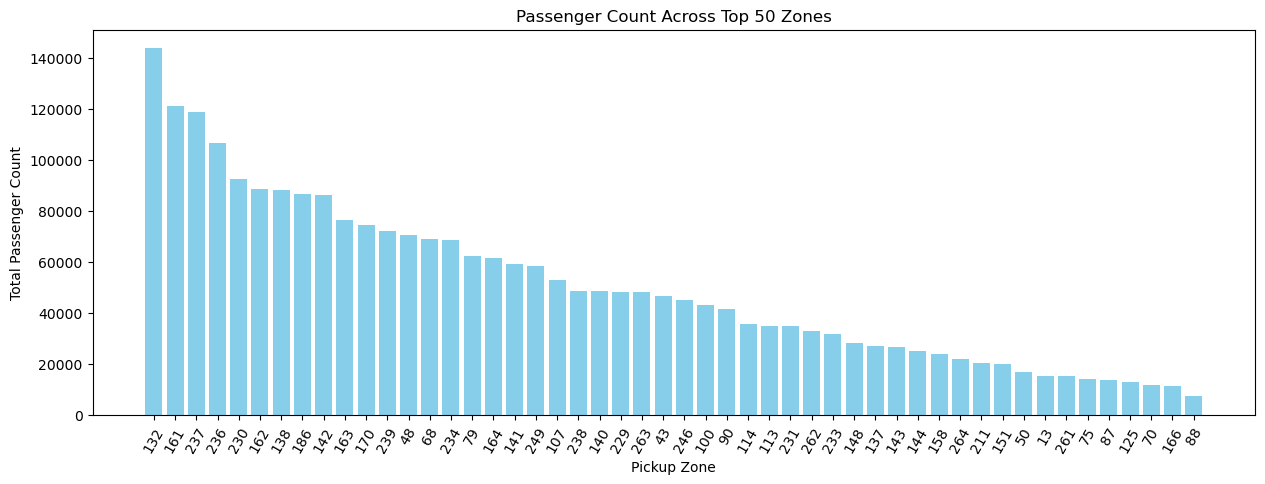

In [189]:
# How does passenger count vary across zones

passenger_by_zone = df5.groupby('PULocationID')['passenger_count'].sum().reset_index()

passenger_by_zone_sorted = passenger_by_zone.sort_values(by="passenger_count", ascending=False).head(50)  # Top 50 zones

plt.figure(figsize=(15, 5))
plt.bar(passenger_by_zone_sorted['PULocationID'].astype(str), passenger_by_zone_sorted['passenger_count'], color='skyblue')
plt.xlabel("Pickup Zone")
plt.ylabel("Total Passenger Count")
plt.title("Passenger Count Across Top 50 Zones")
plt.xticks(rotation=60)
plt.show()

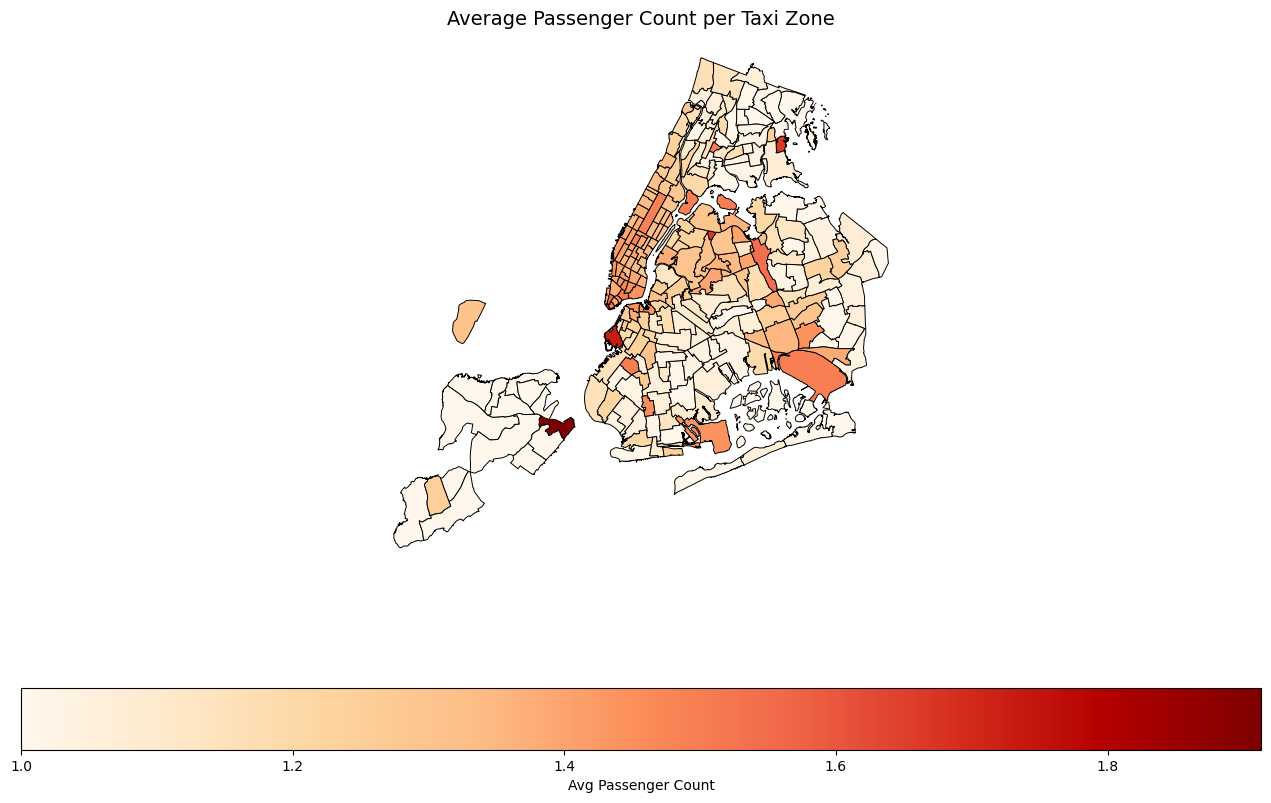

In [193]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

shapefile_path = r"C:\Users\Ranjith\Downloads\Upgrad\NYC Yellow Taxi Datasets\Datasets and Dictionary\taxi_zones\taxi_zones.shp"
zones_with_trips = gpd.read_file(shapefile_path)

avg_passenger_by_zone = df5.groupby('PULocationID', as_index=False)['passenger_count'].mean().rename(columns={'passenger_count': 'avg_passenger_count'})

zones_with_trips = zones_with_trips.merge(avg_passenger_by_zone, left_on='LocationID', right_on='PULocationID', how='left')

fig, ax = plt.subplots(figsize=(16, 10))
zones_with_trips.plot(column='avg_passenger_count', cmap='OrRd', linewidth=0.7, edgecolor='black',legend=True, ax=ax, legend_kwds={'label': "Avg Passenger Count", 'orientation': "horizontal"})
ax.set_title("Average Passenger Count per Taxi Zone", fontsize=14)
ax.axis("off")
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

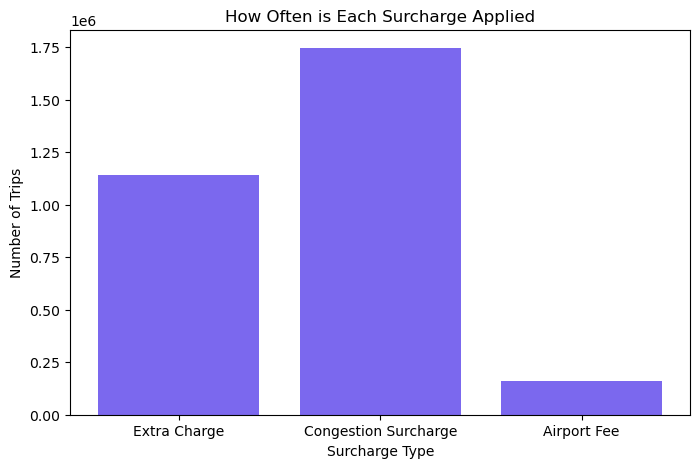

In [199]:
# How often is each surcharge applied?


surcharge_counts = {
    "Extra Charge": (df5['extra'] > 0).sum(),
    "Congestion Surcharge": (df5['congestion_surcharge'] > 0).sum(),
    "Airport Fee": (df5['airportFee'] > 0).sum()
}

surcharge_df = pd.DataFrame(list(surcharge_counts.items()), columns=['Surcharge Type', 'Count'])

plt.figure(figsize=(8, 5))
plt.bar(surcharge_df['Surcharge Type'], surcharge_df['Count'], color='mediumslateblue')
plt.xlabel("Surcharge Type")
plt.ylabel("Number of Trips")
plt.title("How Often is Each Surcharge Applied")
plt.show()

In [200]:
print(surcharge_df)

         Surcharge Type    Count
0          Extra Charge  1141604
1  Congestion Surcharge  1745863
2           Airport Fee   160245


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [206]:
top_pickup_zones = df5['PULocationID'].value_counts().head(10)
top_dropoff_zones = df5['DOLocationID'].value_counts().head(10)

peak_hours = df5.groupby('pickup_hour').size().reset_index(name="trip_count")

df5['speed_mph'] = df5['trip_distance'] / (df5['tpep_dropoff_datetime'] - df5['tpep_pickup_datetime']).dt.total_seconds() * 3600

df5 = df5[(df5['speed_mph'] > 0) & (df5['speed_mph'] < 100)]#to remove unrealistic speed

slow_routes = df5.groupby(['PULocationID', 'DOLocationID'])['speed_mph'].mean().nsmallest(10)

print("Top 10 Pickup Zones:\n", top_pickup_zones)
# print("\nTop 10 Dropoff Zones:\n", top_dropoff_zones)
print("\nPeak Hours for Demand:\n", peak_hours.sort_values(by="trip_count", ascending=False).head(5))
print("\nTop 10 Slow Routes:\n", slow_routes)

Top 10 Pickup Zones:
 PULocationID
132    95953
237    88738
161    87416
236    79667
162    66613
138    64508
186    64225
142    62392
230    62267
170    55621
Name: count, dtype: int64

Peak Hours for Demand:
     pickup_hour  trip_count
18           18      132559
17           17      126433
19           19      118608
15           15      116349
16           16      116288

Top 10 Slow Routes:
 PULocationID  DOLocationID
113           235             0.048105
124           129             0.072029
134           265             0.073831
67            215             0.078091
237           5               0.095037
128           128             0.115385
18            74              0.116505
41            46              0.123035
48            184             0.127919
72            130             0.160643
Name: speed_mph, dtype: float64


***
<font size="10">Summary of Recommendations</font>
***

1. Areas like 132, 237, 161, 236, 162, 138, 186, 142, 230, and 170 show high pickup demand. Deploy more taxis to these locations ahead of rush hours.
2. Best time to take trips are between 3pm to 6pm, use this time to plan the trips. We can dispatch the taxis to hight demand places during these hours.
3. During the hours that are getting low rides, instead of keeping the taxis idle, we can give discounts
4. For Slow Routes, we can add a surge charge for the time taken.


***

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

1. Optimize taxi distribution by focusing on corporate zones during weekdays and entertainment areas on weekends.
2. Increase taxis near transit hubs and office areas from 5 PM to 8 PM for the evening rush.
3. Give discounts for drop offs near the top demanded pick up zones, so the riders wont have to travel for the next ride.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

1. Implement Dynamic Pricing for Peak hours and idle wait time.
2. Raise minimum fare for short distance rides.
3. Discounts for low demands pickups and high demand drop-offs.
4. Reduce 0 revenue rides. (Avoid wrong picups and cancelations)